In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../NY_sample.csv')

print(data.columns)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


In [3]:
df = data[['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'fare_amount', 'payment_type', 'tip_amount']]
df = df[df['payment_type'] == 1]
df = df[['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'fare_amount','tip_amount']]
df.to_csv('cleaning_ny23.csv', index=False)
print(df.columns)

Index(['tpep_pickup_datetime', 'passenger_count', 'trip_distance',
       'fare_amount', 'tip_amount'],
      dtype='object')


In [4]:
print(df)

        tpep_pickup_datetime  passenger_count  trip_distance  fare_amount  \
3        2023-02-01 00:29:33              0.0          18.80         70.9   
4        2023-02-01 00:12:28              1.0           3.22         17.0   
5        2023-02-01 00:52:40              1.0           5.10         21.9   
6        2023-02-01 00:12:39              1.0           8.90         41.5   
7        2023-02-01 00:56:53              1.0           1.20          7.2   
...                      ...              ...            ...          ...   
2746618  2023-02-28 07:48:34              1.0           0.00          7.2   
2746619  2023-02-28 07:02:12              1.0           2.90         14.2   
2746620  2023-02-28 07:25:14              1.0           0.60          5.8   
2746621  2023-02-28 07:54:26              1.0          16.90         70.0   
2746622  2023-02-28 07:21:35              1.0           9.74         38.7   

         tip_amount  
3              0.00  
4              3.30  
5        

In [5]:
# Convert to datetime and extract features
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['percent_tipped'] = df['tip_amount']/df['fare_amount']

In [6]:
print(df)

        tpep_pickup_datetime  passenger_count  trip_distance  fare_amount  \
3        2023-02-01 00:29:33              0.0          18.80         70.9   
4        2023-02-01 00:12:28              1.0           3.22         17.0   
5        2023-02-01 00:52:40              1.0           5.10         21.9   
6        2023-02-01 00:12:39              1.0           8.90         41.5   
7        2023-02-01 00:56:53              1.0           1.20          7.2   
...                      ...              ...            ...          ...   
2746618  2023-02-28 07:48:34              1.0           0.00          7.2   
2746619  2023-02-28 07:02:12              1.0           2.90         14.2   
2746620  2023-02-28 07:25:14              1.0           0.60          5.8   
2746621  2023-02-28 07:54:26              1.0          16.90         70.0   
2746622  2023-02-28 07:21:35              1.0           9.74         38.7   

         tip_amount  pickup_hour  pickup_day_of_week  pickup_month  \
3    

In [7]:
# Categorize pickup days as either weekdays or weekends
def categorize_day(day_of_week):
    if day_of_week < 5:
        return 'weekday'
    else:
        return 'weekend'

df['pickup_day_type'] = df['pickup_day_of_week'].apply(categorize_day)

# Create separate dataframes for weekdays and weekends
weekday_df = df[df['pickup_day_type'] == 'weekday']
weekend_df = df[df['pickup_day_type'] == 'weekend']

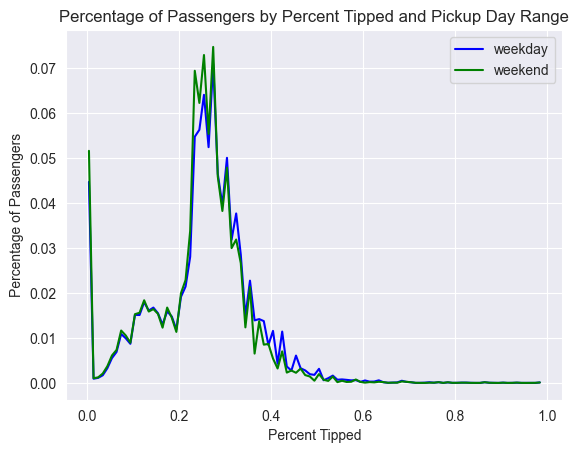

<Figure size 24000x12000 with 0 Axes>

In [12]:
# Calculate the proportion of people paying each tip percentage in the weekday dataframe
bins = np.arange(0, 1, 0.01)

# Calculate the proportion of people paying each tip percentage in the weekend dataframe
weekday_pct = np.histogram(weekday_df['percent_tipped'], bins=bins)[0] / len(weekday_df)
weekend_pct = np.histogram(weekend_df['percent_tipped'], bins=bins)[0] / len(weekend_df)

different_pct = (weekday_pct - weekend_pct)/weekday_pct

bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

fig, ax = plt.subplots()
colors = ['red', 'blue', 'green', 'yellow']

ax.plot(bin_labels, weekday_pct, label='weekday', color=colors[1])
ax.plot(bin_labels, weekend_pct, label='weekend', color=colors[2])

# ax.plot(bin_labels, different_pct, label='different', color=colors[0])

ax.set_xlabel('Percent Tipped')
ax.set_ylabel('Percentage of Passengers')
ax.set_title('Percentage of Passengers by Percent Tipped and Pickup Day Range')
plt.legend()
plt.figure(figsize=(240,120))
plt.show()

In [9]:
weekday_pct = np.histogram(weekday_df['percent_tipped'], bins=bins)[0] / len(weekday_df) * 100
print(sum(np.histogram(weekday_df['percent_tipped'], bins=bins)[0]))
print(len(weekday_df))
# print(np.histogram(weekday_df['percent_tipped'], bins=bins)[0] / len(weekday_df) * 100)

1609408
1611999


In [10]:
print(len(weekday_df[weekday_df['tip_amount'] == 0])/len(weekday_df))

0.04259555992280392
